In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import pprint

%matplotlib inline

## Dataset Source
### Dataset used here for the analysis and its license agreement information can be found  can be found by clicking dataset link 
- DATASETLINK = [dataset_link](https://www.kaggle.com/libinmathew264/youtube-top-4000-channels-based-on-subscribers)

In [7]:
df = pd.read_csv('YouTube.csv', encoding='ISO-8859-1')
df.head()

,web-scraper-order,web-scraper-start-url,userID,userID-href,name,uploads,subscribers,videoviews,country,channeltype,...,YouTube_Link,YouTube_Link-href,TwitterHandle,TwitterHandle-href,InstagramHandle,InstagramHandle-href,MonthlyEarningsMin,MonthlyEarningsMax,YearlyEarningsMin,YearlyEarningsMax
0,1553043067-5148,https://socialblade.com/youtube/top/5000/mosts...,PewDiePie,https://socialblade.com/youtube/c/pewdiepie,PewDiePie,3779,90210848,20772365682,US,Entertainment,...,NaN,https://youtube.com/channel/UC-lHJZR3Gqxm24_Vd...,NaN,https://twitter.com/pewdiepie,NaN,https://instagram.com/pewdiepie,66900.0,1.1M,802.3K,12.8M
1,1553043063-5147,https://socialblade.com/youtube/top/5000/mosts...,T-Series,https://socialblade.com/youtube/c/tseriesmusic,T-Series,13218,90194329,65092058996,IN,Music,...,NaN,https://youtube.com/channel/UCq-Fj5jknLsUf-MWS...,NaN,https://instagram.com/tseries.official,NaN,https://plus.google.com/115156822320080163368,635600.0,10.2M,7.6M,122M
2,1553043059-5146,https://socialblade.com/youtube/top/5000/mosts...,Gaming,https://socialblade.com/youtube/channel/UCOpNc...,Gaming,0,81888222,0,NaN,Games,...,NaN,https://youtube.com/channel/UCOpNcN46UbXVtpKMr...,NaN,NaN,NaN,https://youtube.com/channel/UCOpNcN46UbXVtpKMr...,0.0,0,0,0
3,1553043055-5145,https://socialblade.com/youtube/top/5000/mosts...,YouTube Movies,https://socialblade.com/youtube/channel/UClgRk...,YouTube Movies,0,77413743,0,NaN,Film,...,NaN,https://youtube.com/channel/UClgRkhTL3_hImCAmd...,NaN,NaN,NaN,https://youtube.com/channel/UClgRkhTL3_hImCAmd...,0.0,0,0,0
4,1553043051-5144,https://socialblade.com/youtube/top/5000/mosts...,Sports,https://socialblade.com/youtube/channel/UCEgdi...,Sports,0,75622870,0,NaN,Sports,...,NaN,https://youtube.com/channel/UCEgdi0XIXXZ-qJOFP...,NaN,NaN,NaN,https://youtube.com/channel/UCEgdi0XIXXZ-qJOFP...,0.0,0,0,0


### Part I : The most sought-after contents by the YouTube audience

In [12]:
# which type of channels mostly exist on youtube
popular_channels = df.channeltype.value_counts().to_frame('count')
display(popular_channels)

,count
Entertainment,1037
Music,760
Games,449
People,392
Comedy,275
Howto,223
Film,176
Education,142
Tech,78
Sports,56


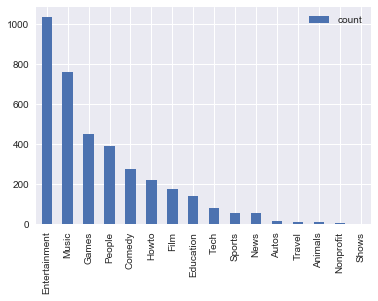

In [21]:
most_popular_channels.plot(kind = 'bar')

### PART II: Curating content for segment-specific audience

In [45]:
# which type of channels has most subscribers
most_subscribed_channels = df.groupby('channeltype').sum()['subscribers'].sort_values(ascending = False).to_frame('subscribers_count')
#most_subscribed_channels.reset_index(level=0, inplace=True)
most_subscribed_channels

,subscribers_count
channeltype,
Entertainment,4793859165
Music,4234542021
Games,1997243729
People,1489163305
Comedy,1270306478
Howto,969533531
Film,742158554
Education,597517878
Sports,325124255


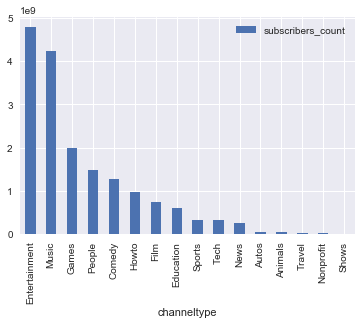

In [46]:
#most_subscribed_channels.plot(kind = 'bar')
most_subscribed_channels.plot(kind = 'bar')

In [47]:
# which country has most subscribers for education channel type
education_subscriber = df[df.channeltype == 'Education'].groupby('country').sum()['subscribers'].sort_values(ascending = False).to_frame('Educational_Subscriber')
education_subscriber

,Educational_Subscriber
country,
US,248772691
IN,135269564
MX,32636910
GB,19313705
CA,12800951
BR,11877530
TR,11495707
DE,10391132
PK,9998893


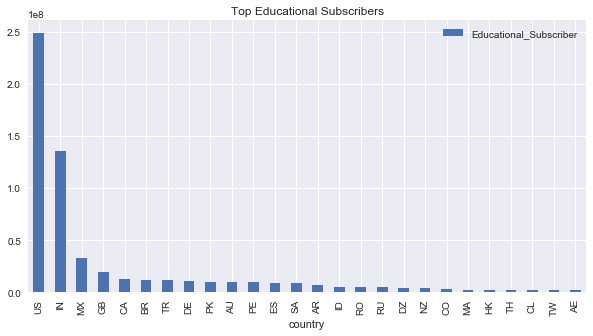

In [53]:
# NOTE INDIA is the second largest educational subscriber
education_subscriber.plot(kind = 'bar', figsize=(10, 5), title="Top Educational Subscribers")

In [49]:
# which country has most subscribers for Music channel type
music_subscriber = df[df.channeltype == 'Music'].groupby('country').sum()['subscribers'].sort_values(ascending = False).to_frame('Music_Subscriber')
music_subscriber

,Music_Subscriber
country,
US,1951880108
IN,482336508
BR,371723426
GB,290950752
KR,129162558
CO,78985664
PR,72532077
MX,61399631
AR,57146277


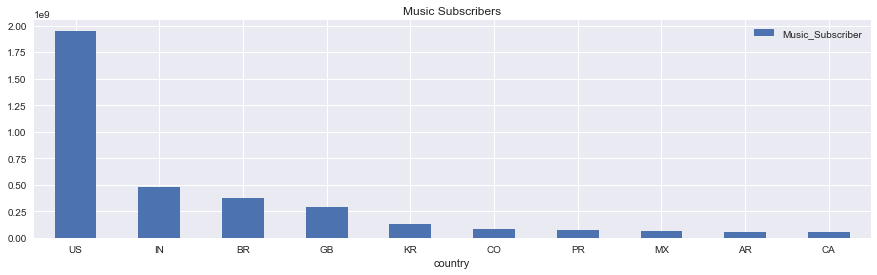

In [56]:
# Top 10 music subscriber based countries
music_subscriber[:10].plot(kind = 'bar', rot=0, figsize=(15, 4), title="Music Subscribers")

In [57]:
# which country has most subscribers for Sports channel type
sports_subscriber = df[df.channeltype == 'Sports'].groupby('country').sum()['subscribers'].sort_values(ascending = False).to_frame('Sports_Subscriber')
sports_subscriber

,Sports_Subscriber
country,
US,118722288
GB,24249282
BR,22354956
ES,19138315
AT,10475526
FR,8467526
AU,7723463
IN,5329213
SA,4942452


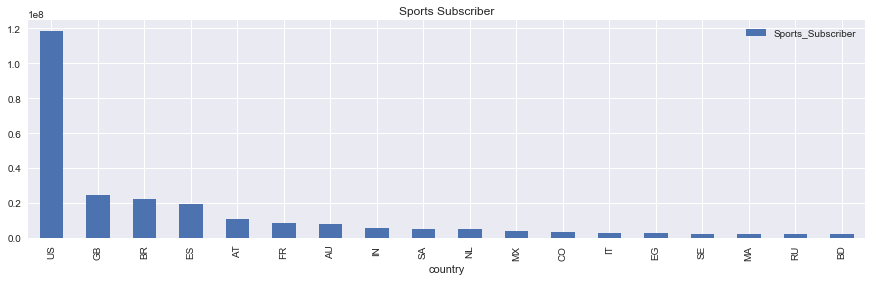

In [62]:
sports_subscriber.plot(kind = 'bar', figsize=(15, 4), title="Sports Subscriber")

In [64]:
# merging all segments into a dataframe
channel_subscribers = None 
for chl_type in df.channeltype.dropna().unique():
    print(chl_type)
    df_ = df[df.channeltype == chl_type].groupby('country').sum()['subscribers'].to_frame(chl_type)
    print(df_.shape)
    if channel_subscribers is None:
        channel_subscribers = df_
    else:
        channel_subscribers = channel_subscribers.join(df_)

Entertainment
(59, 1)
Music
(52, 1)
Games
(38, 1)
Film
(30, 1)
Sports
(18, 1)
Howto
(27, 1)
Education
(26, 1)
Comedy
(35, 1)
News
(13, 1)
People
(37, 1)
Nonprofit
(2, 1)
Animals
(5, 1)
Tech
(14, 1)
Autos
(4, 1)
Travel
(6, 1)
Shows
(1, 1)


In [65]:
df_channel_subscribers = df_channel_subscribers.fillna(0)
df_channel_subscribers

,Entertainment,Music,Games,Film,Sports,Howto,Education,Comedy,News,People,Nonprofit,Animals,Tech,Autos,Travel,Shows
country,,,,,,,,,,,,,,,,
AE,30233678,8.219565e+06,0.0,9633954.0,0.0,5785792.0,1928532.0,0.0,0.0,7205978.0,0.0,0.0,0.0,0.0,0.0,0.0
AL,3051021,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AR,69961902,5.714628e+07,11517773.0,4578561.0,0.0,2724935.0,6773091.0,7236953.0,0.0,4787154.0,0.0,0.0,0.0,0.0,0.0,0.0
AT,2155176,0.000000e+00,3650861.0,0.0,10475526.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AU,46804171,2.918986e+07,39042670.0,2758663.0,7723463.0,26359531.0,9461696.0,5373697.0,0.0,25164109.0,0.0,0.0,0.0,3052067.0,0.0,0.0
BB,31492974,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BD,7294619,4.735486e+06,0.0,2096260.0,2109156.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BE,7809364,7.592014e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BO,2378685,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
df_channel_subscribers.shape

(59, 16)

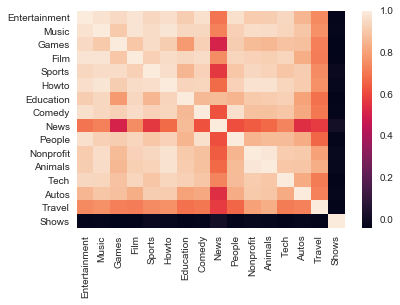

In [67]:
# Correlation of channeltype subscribers count
sns.heatmap(df_channel_subscribers.corr())

### PART III: Monetising your content

In [68]:
highest_earning = df.sort_values('MonthlyEarningsMin', ascending=False)

In [69]:
highest_earning = highest_earning[['name', 'MonthlyEarningsMin']]

In [70]:
highest_earning = highest_earning.set_index('name')

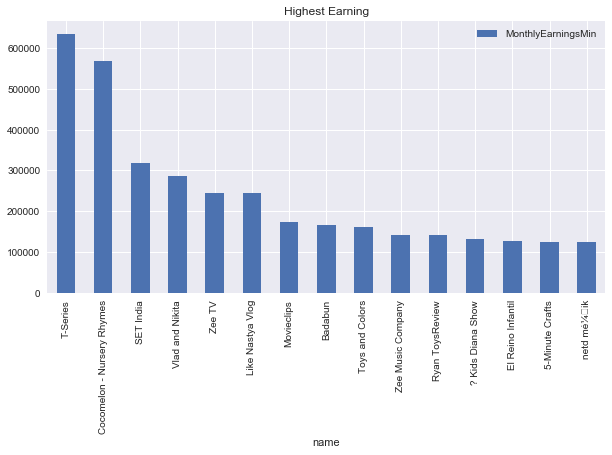

In [77]:
highest_earning.head(15).plot(kind = 'bar', figsize=(10, 5), title="Highest Earning")

In [78]:
highest_earning.head(25)

,MonthlyEarningsMin
name,
T-Series,635600.0
Cocomelon - Nursery Rhymes,567600.0
SET India,318300.0
Vlad and Nikita,286800.0
Zee TV,245200.0
Like Nastya Vlog,244400.0
Movieclips,173400.0
Badabun,164900.0
Toys and Colors,160400.0
